Practica 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
file = '/home/dell/Python/vagrant-ubuntu/atus_anual_2018.csv'

all_variables = ['CONDMUERTO','PASAMUERTO','PEATMUERTO','CICLMUERTO','OTROMUERTO','NEMUERTO','CLASS'] #ojo en el tarjet
features = ['CONDMUERTO','PASAMUERTO','PEATMUERTO','CICLMUERTO','OTROMUERTO','NEMUERTO']
target = ['CLASS']

df = pd.read_csv(file, names=all_variables)
df.head()

,CONDMUERTO,PASAMUERTO,PEATMUERTO,CICLMUERTO,OTROMUERTO,NEMUERTO,CLASS
0,1,1,0,0,0,0,Fatal
1,0,0,1,0,0,0,Fatal
2,0,0,1,0,0,0,Fatal
3,0,1,0,0,0,0,Fatal
4,1,0,0,0,0,0,Fatal


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head(100)

,CONDMUERTO,PASAMUERTO,PEATMUERTO,CICLMUERTO,OTROMUERTO,NEMUERTO
0,0.125,0.111111,0.000000,0.0,0.0,0.0
1,0.000,0.000000,0.333333,0.0,0.0,0.0
2,0.000,0.000000,0.333333,0.0,0.0,0.0
3,0.000,0.111111,0.000000,0.0,0.0,0.0
4,0.125,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
95,0.125,0.000000,0.000000,0.0,0.0,0.0
96,0.125,0.000000,0.000000,0.0,0.0,0.0
97,0.125,0.000000,0.000000,0.0,0.0,0.0
98,0.125,0.000000,0.000000,0.0,0.0,0.0


In [4]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,CONDMUERTO,PASAMUERTO,PEATMUERTO,CICLMUERTO,OTROMUERTO,NEMUERTO
0,1.335313,0.360258,0.015098,-0.000562,-0.001961,-0.0
1,-0.053447,-0.004542,0.983736,-0.002974,-0.000974,-0.0
2,-0.053447,-0.004542,0.983736,-0.002974,-0.000974,0.0
3,0.472305,0.865224,0.000327,-0.003487,-0.001515,0.0
4,0.830565,-0.502853,-0.001251,0.000150,-0.001431,-0.0


In [5]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43089528, 0.30941574, 0.20786741, 0.03575119, 0.01607038,
       0.        ])

In [7]:
df_pca['CLASS'] = df[target]
df_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','CLASS']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,CLASS
0,1.335313,0.360258,0.015098,-0.000562,-0.001961,-0.0,Fatal
1,-0.053447,-0.004542,0.983736,-0.002974,-0.000974,-0.0,Fatal
2,-0.053447,-0.004542,0.983736,-0.002974,-0.000974,0.0,Fatal
3,0.472305,0.865224,0.000327,-0.003487,-0.001515,0.0,Fatal
4,0.830565,-0.502853,-0.001251,0.000150,-0.001431,-0.0,Fatal


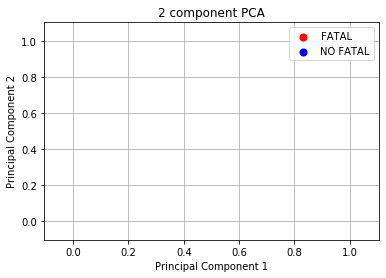

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['FATAL', 'NO FATAL']
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['CLASS'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC3']
    , df_pca.loc[indicesToKeep, 'PC5']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()